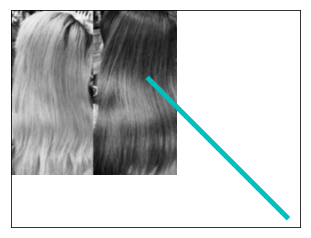

(240, 240)

In [28]:
#https://piratefsh.github.io/image-processing-101/

import cv2
import numpy as np
from matplotlib import pyplot as plt

img_g = cv2.imread('crazyhair.jpg',cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.plot([200,300,400],[100,200,300],'c', linewidth=5)
plt.show()
img_g.shape

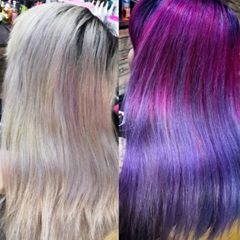

In [42]:
from IPython.display import Image
Image(filename='crazyhair.jpg')

In [33]:
img = cv2.imread('crazyhair.jpg')
print(img.shape)
print(img)

(240, 240, 3)
[[[203 206 214]
  [ 57  61  62]
  [ 56  60  48]
  ...
  [ 53  63  73]
  [ 57  68  82]
  [ 69  80  94]]

 [[157 160 168]
  [142 146 147]
  [191 195 183]
  ...
  [ 57  67  77]
  [ 64  75  89]
  [ 67  78  92]]

 [[152 155 163]
  [170 174 175]
  [253 255 248]
  ...
  [ 89 101 111]
  [ 71  80  94]
  [ 48  57  71]]

 ...

 [[104 102 101]
  [ 91  89  88]
  [ 86  86  86]
  ...
  [ 65 141 170]
  [ 60 138 167]
  [ 54 132 161]]

 [[ 98  96  95]
  [ 86  84  83]
  [ 92  92  92]
  ...
  [ 64 140 169]
  [ 58 136 165]
  [ 54 133 160]]

 [[ 89  87  86]
  [ 84  82  81]
  [101 101 101]
  ...
  [ 63 139 168]
  [ 57 136 163]
  [ 55 134 161]]]


In [41]:
means = cv2.mean(img)
means


(139.55694444444444, 109.57177083333333, 134.81861111111112, 0.0)

In [24]:
#https://piratefsh.github.io/image-processing-101/
# find average per row
# np.average() takes in an axis argument which finds the average across that axis. 
average_color_per_row = np.average(img, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0)

# convert back to uint8
average_color = np.uint8(average_color)
print(average_color)


[139 109 134]


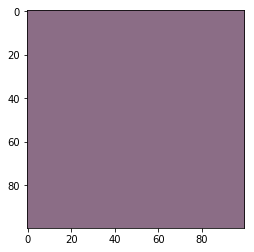

In [25]:
# create 100 x 100 pixel array with average color value
average_color_img = np.array([[average_color]*100]*100, np.uint8)

plt.imshow(average_color_img)

In [19]:
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# grayscale image represented as a 2-d array
print(gray_img)

[[204  61  58 ...  62  66  78]
 [159 146 195 ...  64  73  76]
 [153 175 254 ...  99  78  55]
 ...
 [102  89  86 ... 122 118 113]
 [ 96  84  92 ... 121 116 112]
 [ 87  82 101 ... 119 115 113]]


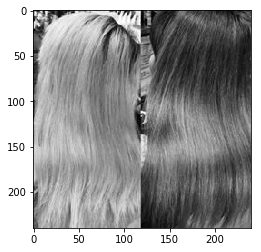

In [20]:
#https://piratefsh.github.io/image-processing-101/

# have to convert grayscale back to RGB for plt.imshow()
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))

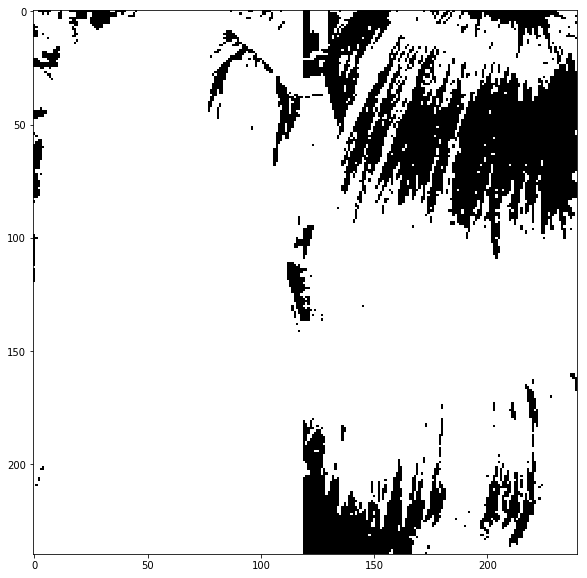

In [23]:
# threshold for grayscale image
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(10,10))
plt.imshow(threshold_img)

True

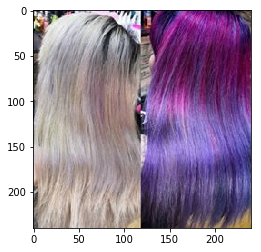

In [27]:
coins = cv2.imread('crazyhair.jpg')
plt.imshow(cv2.cvtColor(coins, cv2.COLOR_BGR2RGB))
cv2.imwrite('crazyhair.jpg', coins)

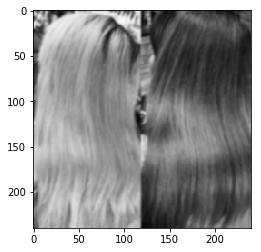

In [28]:
# get binary image and apply Gaussian blur
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, (5, 5), 0)

plt.imshow(cv2.cvtColor(coins_preprocessed, cv2.COLOR_GRAY2RGB))

False

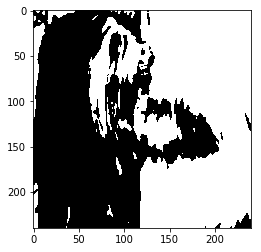

In [29]:
_, coins_binary = cv2.threshold(coins_preprocessed, 130, 255, cv2.THRESH_BINARY)

# invert image to get coins
coins_binary = cv2.bitwise_not(coins_binary)
plt.imshow(cv2.cvtColor(coins_binary, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/coins-binary.png', coins_binary)

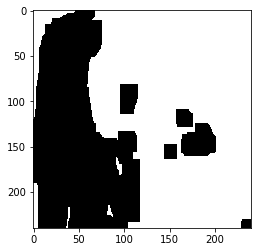

In [30]:

# morph coins by eroding and dilating to remove noise
morph_kernel = np.ones((15,15),np.uint8)
coins_morph = cv2.morphologyEx(coins_binary, cv2.MORPH_CLOSE, morph_kernel)

plt.imshow(cv2.cvtColor(coins_morph, cv2.COLOR_GRAY2RGB))

number of coins: 5


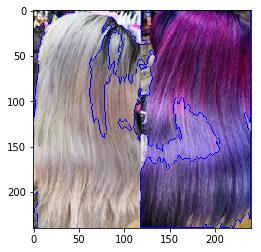

In [31]:

# find contours
coins_contours, _ = cv2.findContours(coins_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# make copy of image
coins_and_contours = np.copy(coins)

# find contours of large enough area
min_coin_area = 60
large_contours = [cnt for cnt in coins_contours if cv2.contourArea(cnt) > min_coin_area]

# draw contours
cv2.drawContours(coins_and_contours, large_contours, -1, (255,0,0))

plt.imshow(cv2.cvtColor(coins_and_contours, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/coins-contour.jpg', coins_and_contours)

# print number of contours
print('number of coins: %d' % len(large_contours))

False

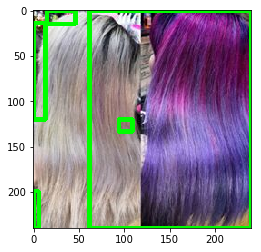

In [32]:
# create copy of image to draw bounding boxes
bounding_img = np.copy(coins)

# for each contour find bounding box and draw rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(bounding_img, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/coins-bounding.jpg', bounding_img)

True

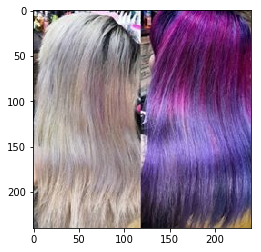

In [33]:
#edge
cups = cv2.imread('crazyhair.jpg')
plt.imshow(cv2.cvtColor(cups, cv2.COLOR_BGR2RGB))
cv2.imwrite('crazyhair-orig.jpg', cups)

In [35]:
# preprocess by blurring and grayscale
cups_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(cups, (7,7), 0), cv2.COLOR_BGR2GRAY)


False

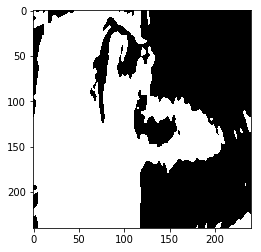

In [36]:
# find binary image with thresholding
low_thresh = 120
high_thresh = 200
_, cups_thresh = cv2.threshold(cups_preprocessed, low_thresh, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(cups_thresh, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/cups-thresh-low.png', cups_thresh)

_, cups_thresh_hi = cv2.threshold(cups_preprocessed, high_thresh, 255, cv2.THRESH_BINARY)
cv2.imwrite('output/cups-thresh-hi.png', cups_thresh_hi)

False

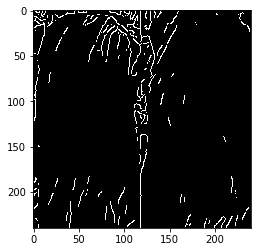

In [37]:
# find binary image with edges
cups_edges = cv2.Canny(cups_preprocessed, threshold1=90, threshold2=110)
plt.imshow(cv2.cvtColor(cups_edges, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/cups-edges.png', cups_edges)

In [45]:
# find hough circles
circles = cv2.HoughCircles(cups_edges, cv2.cv.CV_HOUGH_GRADIENT, dp=1.5, minDist=50, minRadius=20, maxRadius=130)
cups_circles = np.copy(cups)

# if circles are detected, draw them
if circles is not None and len(circles) > 0:
    for (x, y, r) in circles[0]:
        x, y, r = int(x), int(y), int(r)
        cv2.circle(cups_circles, (x, y), r, (255, 255, 0), 4)
    plt.imshow(cv2.cvtColor(cups_circles, cv2.COLOR_BGR2RGB))

print('number of circles detected: %d' % len(circles[0]))
cv2.imwrite('output/cups-circles.jpg', cups)

NameError: name 'cups_edges' is not defined

In [1]:
#### L'oreal


In [ ]:
#https://piratefsh.github.io/image-processing-101/

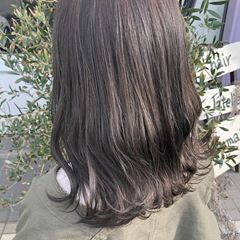

In [105]:
from IPython.display import Image
Image(filename='ins2.jpg')

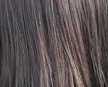

In [106]:
from IPython.display import Image
Image(filename='ins2-2.jpg')


[81 81 89]


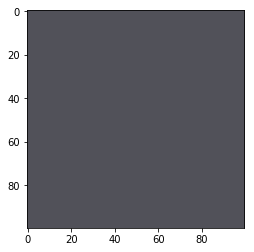

In [108]:
import cv2
import numpy as np

img = cv2.imread('ins2-2.jpg')
means = cv2.mean(img)
means
average_color_per_row = np.average(img, axis=0)
average_color = np.average(average_color_per_row, axis=0)
average_color2 = np.uint8(average_color)
print(average_color2)
average_color_img = np.array([[average_color]*100]*100, np.uint8)
plt.imshow(average_color_img)